In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import DeepCas13

In [2]:
## Prepare the train and test data
X_train = pd.read_csv('data/X_train.csv', header=0, index_col=0)
X_test = pd.read_csv('data/X_test.csv', header=0, index_col=0)
y_train = pd.read_csv('data/y_train.csv', header=0, index_col=0)
y_test = pd.read_csv('data/y_test.csv', header=0, index_col=0)

## Train deep learning model and predict efficiency
df_DeepScore = DeepCas13.train_and_predict(X_train, y_train, X_test)

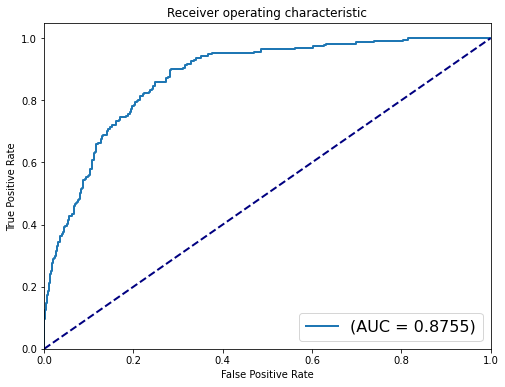

In [3]:
## Evaluate the performance: 
##     1. Plot ROC curve
##     2. Calculate AUC score

plt.figure(figsize=(8,6))

list_lfc = y_test.loc[df_DeepScore.index, 'LFC'].to_list()
y_dl = df_DeepScore.to_list()
fpr, tpr, _= roc_curve([x<(-0.5) for x in list_lfc],y_dl)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, color='tab:blue', lw=2, label='(AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size': 16})